In [79]:
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
cc_data = pd.read_csv('creditcard.csv')
recession_data = pd.read_csv('africa_recession.csv')

In [4]:
cc_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
cc_label = cc_data['Class']

In [6]:
del cc_data['Class']
del cc_data['Time']

In [7]:
recession_data

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,4.265433e+05,0.009374,0.648979,0.626111,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,8.046022e+05,0.019658,0.719390,0.657543,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,6.707259e+04,0.001670,0.308652,0.292607,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5.790397e+03,0.000184,0.205865,0.234643,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,1.690724e+04,0.000431,0.959765,0.993985,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,12.208407,6.215000,0.509075,1.837961,21853.750000,26727.062500,5.534759e+04,0.000896,0.234562,0.248461,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
482,29.784193,15.389316,0.516694,1.467321,94663.101560,138279.359400,1.080252e+06,0.016209,0.337927,0.287038,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,1
483,55.797787,25.301973,0.453458,1.689919,102405.859400,137377.593800,7.739462e+05,0.009984,0.259968,0.248847,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0
484,15.850567,5.277823,0.332974,1.579579,42087.269530,55202.140630,1.829390e+05,0.002542,0.470906,0.491789,...,220.62,1262.71,0.162721,0.105791,0.239561,0.078946,0.198187,0.073211,0.026477,0


In [8]:
recession_label = recession_data['growthbucket']

In [9]:
del recession_data['growthbucket']

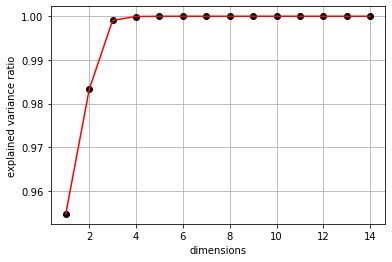

In [10]:
pca = sklearn.decomposition.PCA(n_components = 15)
principal_components = pca.fit(recession_data)
x = list(range(1,15))
y = [sum(pca.explained_variance_ratio_[:n]) for n in x]
plt.plot(x,y, 'ko')
plt.plot(x,y,'r-')
plt.xlabel('dimensions')
plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

In [11]:
pca = sklearn.decomposition.PCA(n_components = 3)
principal_components = pca.fit_transform(recession_data)
recession_pca = pd.DataFrame(data = principal_components, columns = ['principal component 1','principal component 2', 'principal component 3'])

In [12]:
recession_pca

,principal component 1,principal component 2,principal component 3
0,4.232731e+05,82909.714223,-139174.986299
1,1.493806e+06,438167.211793,-249557.407441
2,-2.319926e+05,40363.184785,-9490.551161
3,-3.962167e+05,-9001.273880,19005.620294
4,-3.680777e+05,-3414.865523,3435.511882
...,...,...,...
481,-3.247187e+05,-13554.787486,31466.095241
482,1.000699e+06,-299463.737922,-192737.319311
483,6.265769e+05,-189593.500267,-76714.363207
484,-1.459176e+05,-35730.022984,20915.643952


In [13]:
### see the data balance in both labels now
unique, counts = np.unique(cc_label, return_counts = True)
print('Credit Card class imbalance')
print(dict(zip(unique,counts)))
unique, counts = np.unique(recession_label, return_counts = True)
print('Recession Class Imbalance')
print(dict(zip(unique,counts)))

Credit Card class imbalance
{0: 284315, 1: 492}
Recession Class Imbalance
{0: 448, 1: 38}


In [19]:
### random over sampling
ros = RandomOverSampler()
x_cc_ros, y_cc_ros = ros.fit_resample(cc_data, cc_label)
x_recession_ros, y_recession_ros = ros.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_ros))
print(Counter(y_recession_ros))

Counter({0: 284315, 1: 284315})
Counter({0: 448, 1: 448})


In [20]:
### random undersampling
rus = RandomUnderSampler()
x_cc_rus, y_cc_rus = rus.fit_resample(cc_data, cc_label)
x_recession_rus, y_recession_rus = rus.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_rus))
print(Counter(y_recession_rus))

Counter({0: 492, 1: 492})
Counter({0: 38, 1: 38})


In [24]:
### Centroid based undersampling
cc = ClusterCentroids()
x_cc_res, y_cc_res = cc.fit_resample(cc_data,cc_label)
x_recession_res, y_recession_res = cc.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_res))
print(Counter(y_recession_res))

Counter({0: 492, 1: 492})
Counter({0: 38, 1: 38})


In [26]:
### Near Miss undersampling
nm = NearMiss()
x_cc_nm, y_cc_nm = nm.fit_resample(cc_data, cc_label)
x_recession_nm, y_recession_nm = nm.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_nm))
print(Counter(y_recession_nm))

Counter({0: 492, 1: 492})
Counter({0: 38, 1: 38})


In [29]:
### SMOTE
smt = SMOTE()
x_cc_smt, y_cc_smt = smt.fit_resample(cc_data,cc_label)
x_recession_smt, y_recession_smt = smt.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_smt))
print(Counter(y_recession_smt))

Counter({0: 284315, 1: 284315})
Counter({0: 448, 1: 448})


In [32]:
### ADASYN
ada = ADASYN()
x_cc_ada, y_cc_ada = ada.fit_resample(cc_data, cc_label)
x_recession_ada, y_recession_ada = ada.fit_resample(recession_pca, recession_label)
print(Counter(y_cc_ada))
print(Counter(y_recession_ada))

Counter({0: 284315, 1: 284240})
Counter({0: 448, 1: 439})


# Below are models implemented with raw unbalanced data

In [65]:
x_train, x_test, y_train, y_test = train_test_split(cc_data, cc_label, test_size = 0.2)
x1_train, x1_test, y1_train, y1_test = train_test_split(recession_pca, recession_label, test_size = 0.2)

## Logistic Regression

In [66]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[56854     9]
 [   42    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.58      0.69        99

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [67]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(x1_train, y1_train)
y1_pred = logreg.predict(x1_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
print(classification_report(y1_test, y1_pred))

[[21 70]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        91
           1       0.09      1.00      0.17         7

    accuracy                           0.29        98
   macro avg       0.55      0.62      0.27        98
weighted avg       0.94      0.29      0.36        98



## Decision tree

In [69]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[56839    24]
 [   25    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.75      0.75        99

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [70]:
clf = tree.DecisionTreeClassifier()
clf.fit(x1_train, y1_train)
y1_pred = clf.predict(x1_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
print(classification_report(y1_test, y1_pred))

[[88  3]
 [ 6  1]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        91
           1       0.25      0.14      0.18         7

    accuracy                           0.91        98
   macro avg       0.59      0.55      0.57        98
weighted avg       0.89      0.91      0.90        98



## Random Forests

In [77]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[56860     3]
 [   22    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.78      0.86        99

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [78]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x1_train, y1_train)
y1_pred = rf.predict(x1_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print(confusion_matrix)
print(classification_report(y1_test, y1_pred))

[[91  0]
 [ 7  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        91
           1       0.00      0.00      0.00         7

    accuracy                           0.93        98
   macro avg       0.46      0.50      0.48        98
weighted avg       0.86      0.93      0.89        98



C:\Users\anson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anson\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feedforward Neural Network

In [80]:
model = Sequential([
    Dense(20, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(2, activation = 'softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=15)
test_loss, test_acc = model.evaluate(x_test,y_test,verbose = 2)
y_pred = model.predict(x_test)
preds_index = np.argmax(y_pred, axis = 1)
print(confusion_matrix(y_test,preds_index))
print(classification_report(y_test, preds_index))


Epoch 1/15
7121/7121 [==============================] - 5s 677us/step - loss: 0.0461 - accuracy: 0.9919
Epoch 2/15
7121/7121 [==============================] - 5s 691us/step - loss: 0.0050 - accuracy: 0.9992
Epoch 3/15
7121/7121 [==============================] - 5s 688us/step - loss: 0.0047 - accuracy: 0.9993
Epoch 4/15
7121/7121 [==============================] - 5s 689us/step - loss: 0.0043 - accuracy: 0.9992
Epoch 5/15
7121/7121 [==============================] - 5s 721us/step - loss: 0.0037 - accuracy: 0.9992
Epoch 6/15
7121/7121 [==============================] - 5s 745us/step - loss: 0.0042 - accuracy: 0.9993
Epoch 7/15
7121/7121 [==============================] - 5s 727us/step - loss: 0.0034 - accuracy: 0.9993
Epoch 8/15
7121/7121 [==============================] - 5s 725us/step - loss: 0.0035 - accuracy: 0.9992
Epoch 9/15
7121/7121 [==============================] - 5s 719us/step - loss: 0.0027 - accuracy: 0.9993
Epoch 10/15
7121/7121 [==============================] - 5s 740u

In [81]:
model = Sequential([
    Dense(20, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(2, activation = 'softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x1_train, y1_train, epochs=15)
test_loss, test_acc = model.evaluate(x1_test,y1_test,verbose = 2)
y1_pred = model.predict(x1_test)
preds_index = np.argmax(y1_pred, axis = 1)
print(confusion_matrix(y1_test,preds_index))
print(classification_report(y1_test, preds_index))


Epoch 1/15
13/13 [==============================] - 0s 1ms/step - loss: 49158.6336 - accuracy: 0.0968
Epoch 2/15
13/13 [==============================] - 0s 667us/step - loss: 44718.3228 - accuracy: 0.6267
Epoch 3/15
13/13 [==============================] - 0s 667us/step - loss: 21095.5587 - accuracy: 0.7036
Epoch 4/15
13/13 [==============================] - 0s 666us/step - loss: 11677.1631 - accuracy: 0.7586
Epoch 5/15
13/13 [==============================] - 0s 667us/step - loss: 5384.9889 - accuracy: 0.7532
Epoch 6/15
13/13 [==============================] - 0s 1ms/step - loss: 2773.7326 - accuracy: 0.7332
Epoch 7/15
13/13 [==============================] - 0s 667us/step - loss: 1513.9830 - accuracy: 0.7700
Epoch 8/15
13/13 [==============================] - 0s 667us/step - loss: 1756.0788 - accuracy: 0.7936
Epoch 9/15
13/13 [==============================] - 0s 667us/step - loss: 1718.3090 - accuracy: 0.7885
Epoch 10/15
13/13 [==============================] - 0s 666us/step - loss

# Run balanced datasets through the same models now

In [84]:
all_data_x = [x_cc_ros, x_recession_ros, x_cc_rus, x_recession_rus, x_cc_res, x_recession_res, x_cc_nm, x_recession_nm, x_cc_smt,
             x_recession_smt, x_cc_ada, x_recession_ada]
all_data_y = [y_cc_ros, y_recession_ros, y_cc_rus, y_recession_rus, y_cc_res, y_recession_res, y_cc_nm, y_recession_nm,
             y_cc_smt, y_recession_smt, y_cc_ada, y_recession_ada]

In [87]:
for i in range(0,len(all_data_x)):
    x_train, x_test, y_train, y_test = train_test_split(all_data_x[i], all_data_y[i], test_size = 0.2)
    logreg = LogisticRegression(max_iter = 100000)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))

[[55593  1284]
 [ 4471 52378]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56877
           1       0.98      0.92      0.95     56849

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

[[18 68]
 [ 6 88]]
              precision    recall  f1-score   support

           0       0.75      0.21      0.33        86
           1       0.56      0.94      0.70        94

    accuracy                           0.59       180
   macro avg       0.66      0.57      0.52       180
weighted avg       0.65      0.59      0.52       180

[[ 82   3]
 [  8 104]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.97      0.93      0.95       112

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
w

In [88]:
for i in range(0,len(all_data_x)):
    x_train, x_test, y_train, y_test = train_test_split(all_data_x[i], all_data_y[i], test_size = 0.2)
    clf = tree.DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))

[[56751    22]
 [    0 56953]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56773
           1       1.00      1.00      1.00     56953

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[80  4]
 [ 0 96]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.96      1.00      0.98        96

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

[[94 12]
 [ 9 82]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       106
           1       0.87      0.90      0.89        91

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weigh

In [89]:
for i in range(0,len(all_data_x)):
    x_train, x_test, y_train, y_test = train_test_split(all_data_x[i], all_data_y[i], test_size = 0.2)
    rf = RandomForestClassifier(n_estimators = 100)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))

[[56670     3]
 [    0 57053]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56673
           1       1.00      1.00      1.00     57053

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[89  5]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        94
           1       0.95      1.00      0.97        86

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180

[[86  0]
 [14 97]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       1.00      0.87      0.93       111

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weigh

In [91]:
for i in range(0,len(all_data_x)):
    x_train, x_test, y_train, y_test = train_test_split(all_data_x[i], all_data_y[i], test_size = 0.2)
    model = Sequential([
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(2, activation = 'softmax')
    ])
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    history = model.fit(x_train, y_train, epochs=15)
    test_loss, test_acc = model.evaluate(x_test,y_test,verbose = 2)
    y_pred = model.predict(x_test)
    preds_index = np.argmax(y_pred, axis = 1)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,preds_index))
    print(classification_report(y_test, preds_index))

Epoch 1/15
14216/14216 [==============================] - 10s 691us/step - loss: 0.1850 - accuracy: 0.9481
Epoch 2/15
14216/14216 [==============================] - 10s 722us/step - loss: 0.0424 - accuracy: 0.9855
Epoch 3/15
14216/14216 [==============================] - 10s 723us/step - loss: 0.0298 - accuracy: 0.9895
Epoch 4/15
14216/14216 [==============================] - 10s 715us/step - loss: 0.0251 - accuracy: 0.9913
Epoch 5/15
14216/14216 [==============================] - 10s 722us/step - loss: 0.0202 - accuracy: 0.9937
Epoch 6/15
14216/14216 [==============================] - 10s 730us/step - loss: 0.0179 - accuracy: 0.9946
Epoch 7/15
14216/14216 [==============================] - 11s 740us/step - loss: 0.0167 - accuracy: 0.9952
Epoch 8/15
14216/14216 [==============================] - 11s 753us/step - loss: 0.0157 - accuracy: 0.9953
Epoch 9/15
14216/14216 [==============================] - 10s 738us/step - loss: 0.0129 - accuracy: 0.9964
Epoch 10/15
14216/14216 [============

25/25 [==============================] - 0s 667us/step - loss: 0.4220 - accuracy: 0.8595
Epoch 6/15
25/25 [==============================] - 0s 667us/step - loss: 0.4233 - accuracy: 0.8556
Epoch 7/15
25/25 [==============================] - 0s 665us/step - loss: 0.4087 - accuracy: 0.8603
Epoch 8/15
25/25 [==============================] - 0s 667us/step - loss: 0.3843 - accuracy: 0.8803
Epoch 9/15
25/25 [==============================] - 0s 666us/step - loss: 0.3820 - accuracy: 0.8836
Epoch 10/15
25/25 [==============================] - 0s 666us/step - loss: 0.3636 - accuracy: 0.8821
Epoch 11/15
25/25 [==============================] - 0s 668us/step - loss: 0.3690 - accuracy: 0.8934
Epoch 12/15
25/25 [==============================] - 0s 665us/step - loss: 0.3492 - accuracy: 0.8926
Epoch 13/15
25/25 [==============================] - 0s 667us/step - loss: 0.3330 - accuracy: 0.9064
Epoch 14/15
25/25 [==============================] - 0s 668us/step - loss: 0.3448 - accuracy: 0.8947
Epoch 

2/2 [==============================] - 0s 0s/step - loss: 13333.4033 - accuracy: 0.2944
1/1 - 0s - loss: 4197.5103 - accuracy: 0.3750
[[0 9]
 [1 6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.40      0.86      0.55         7

    accuracy                           0.38        16
   macro avg       0.20      0.43      0.27        16
weighted avg       0.18      0.38      0.24        16

Epoch 1/15
14216/14216 [==============================] - 10s 667us/step - loss: 0.1226 - accuracy: 0.9582
Epoch 2/15
14216/14216 [==============================] - 9s 660us/step - loss: 0.0455 - accuracy: 0.9837
Epoch 3/15
14216/14216 [==============================] - 9s 664us/step - loss: 0.0370 - accuracy: 0.9880
Epoch 4/15
14216/14216 [==============================] - 9s 663us/step - loss: 0.0295 - accuracy: 0.9903
Epoch 5/15
14216/14216 [==============================] - 9s 663us/step - loss: 0.0225 - accuracy: 

23/23 [==============================] - 0s 727us/step - loss: 487.1259 - accuracy: 0.5526
Epoch 4/15
23/23 [==============================] - 0s 727us/step - loss: 255.6368 - accuracy: 0.5731
Epoch 5/15
23/23 [==============================] - 0s 364us/step - loss: 270.7318 - accuracy: 0.5720
Epoch 6/15
23/23 [==============================] - 0s 364us/step - loss: 165.4094 - accuracy: 0.5991
Epoch 7/15
23/23 [==============================] - 0s 364us/step - loss: 74.0208 - accuracy: 0.5849
Epoch 8/15
23/23 [==============================] - 0s 727us/step - loss: 30.5039 - accuracy: 0.6114
Epoch 9/15
23/23 [==============================] - 0s 727us/step - loss: 73.7084 - accuracy: 0.5664
Epoch 10/15
23/23 [==============================] - 0s 727us/step - loss: 48.9909 - accuracy: 0.5965
Epoch 11/15
23/23 [==============================] - 0s 727us/step - loss: 138.5072 - accuracy: 0.5650
Epoch 12/15
23/23 [==============================] - 0s 727us/step - loss: 167.4579 - accuracy: